In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from py_helpers import *

# Define the path with the csv files
report_plots_path = "D:\\Brain-MINDS\\processed_dMRI\\MRTRIX\\A6DR-R01_0083-TT56\\report_plots"

In [16]:
# Grab all the csv files in the path
csv_files = glob_files(report_plots_path, "csv")

# Define a data store
data_store = {
    "unoptimized": [],
    "optimized": []
}

# Define a function to determine the atlas type
def determine_atlas_type(file):
    if "MBCA" in file:
        return "MBCA"
    elif "MBM" in file:
        return "MBM"
    return None

# Load the csv files into the data store
for file in csv_files:
    atlas_type = determine_atlas_type(file)
    data = {
        "path": file,
        "data_array": np.log(np.genfromtxt(file, delimiter=",") + 1),
        "atlas_type": atlas_type
    }
    if "unoptimized" in file:
        data_store["unoptimized"].append(data)
    elif "optimized" in file:
        data_store["optimized"].append(data)

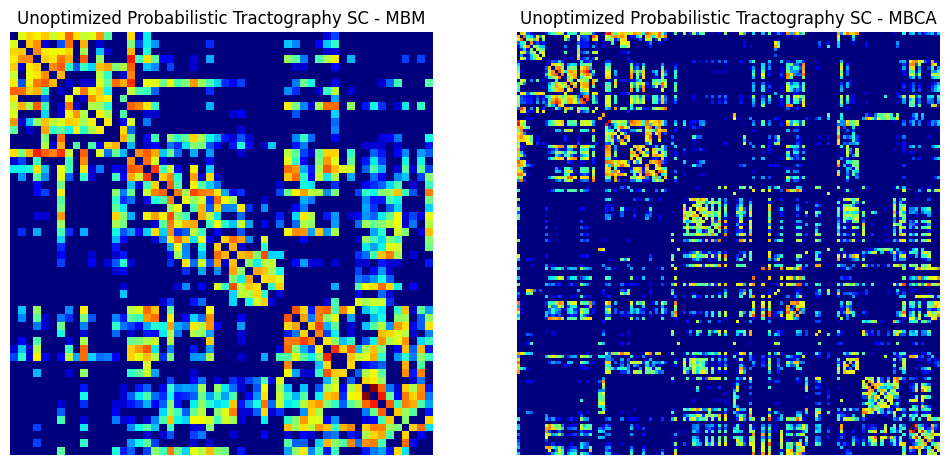

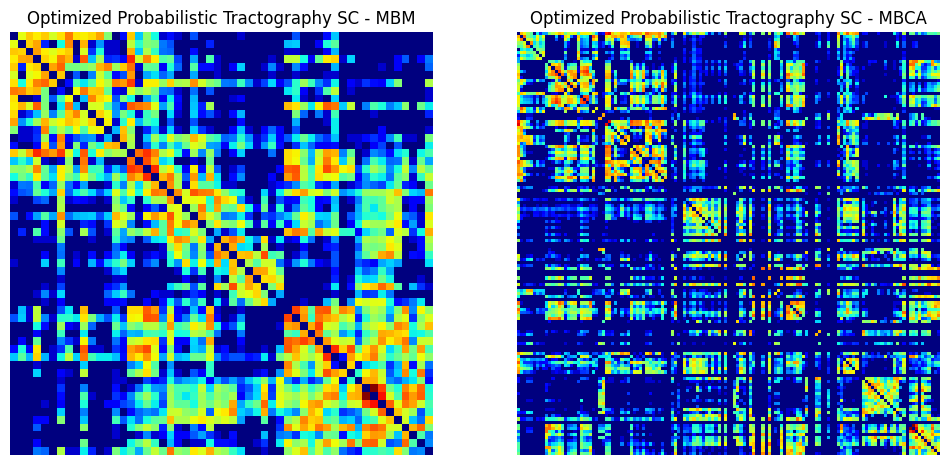

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data_store):
    
    # Define a helper function to get data arrays
    def get_data_arrays(optimization, atlas):
        return [entry["data_array"] for entry in data_store[optimization] if entry["atlas_type"] == atlas]

    # Define a helper function to determine common vmin and vmax for a given set of data arrays
    def get_vmin_vmax(data_arrays):
        vmin = min([np.min(data) for data in data_arrays])
        vmax = max([np.max(data) for data in data_arrays])
        return vmin, vmax

    # Prepare data for plotting
    unoptimized_MBM = get_data_arrays("unoptimized", "MBM")
    unoptimized_MBCA = get_data_arrays("unoptimized", "MBCA")
    optimized_MBM = get_data_arrays("optimized", "MBM")
    optimized_MBCA = get_data_arrays("optimized", "MBCA")

    # Plot data for unoptimized
    fig_unopt, axes_unopt = plt.subplots(1, 2, figsize=(12, 6))
    vmin_unopt, vmax_unopt = get_vmin_vmax(unoptimized_MBM + unoptimized_MBCA)
    
    for i, data in enumerate(unoptimized_MBM):
        axes_unopt[0].imshow(data, interpolation='nearest', aspect='equal', cmap="jet", vmin=vmin_unopt, vmax=vmax_unopt)
        axes_unopt[0].set_title(f'Unoptimized Probabilistic Tractography SC - MBM')
        axes_unopt[0].axis('off')
        
    for i, data in enumerate(unoptimized_MBCA):
        axes_unopt[1].imshow(data, interpolation='nearest', aspect='equal', cmap="jet", vmin=vmin_unopt, vmax=vmax_unopt)
        axes_unopt[1].set_title(f'Unoptimized Probabilistic Tractography SC - MBCA')
        axes_unopt[1].axis('off')

    # Plot data for optimized
    fig_opt, axes_opt = plt.subplots(1, 2, figsize=(12, 6))
    vmin_opt, vmax_opt = get_vmin_vmax(optimized_MBM + optimized_MBCA)
    
    for i, data in enumerate(optimized_MBM):
        axes_opt[0].imshow(data, interpolation='nearest', aspect='equal', cmap="jet", vmin=vmin_opt, vmax=vmax_opt)
        axes_opt[0].set_title(f'Optimized Probabilistic Tractography SC - MBM')
        axes_opt[0].axis('off')
        
    for i, data in enumerate(optimized_MBCA):
        axes_opt[1].imshow(data, interpolation='nearest', aspect='equal', cmap="jet", vmin=vmin_opt, vmax=vmax_opt)
        axes_opt[1].set_title(f'Optimized Probabilistic Tractography SC - MBCA')
        axes_opt[1].axis('off')

    plt.show()

# Use the function
plot_data(data_store)